

同学们好，本次作业的主要内容为使用pandas进行数据预处理。希望这两天你们已经从Python的课程内容中回过神来了。
没有数据的分析是无源之水，能够熟练处理数据是成为合格的数据分析师的基本要求，希望大家在今后多多实战，成为数据大师。

本次作业将使用公开标普500的股票数据。
https://www.kaggle.com/dgawlik/nyse#prices-split-adjusted.csv

作业的形式以问答为主，因为不涉及过长的代码，核心是数据的操作，所以这里没有太多的代码模板可供大家参考。
希望大家能从搜索引擎（google/bing）问答社区（stackoverflow）或者[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)或者我提供的jupyter notebooks 中找到回答问题需要的方法。
请时刻牢记数据的增删改查四种原子操作，思考我们的问题可以被如何分解。

那么首先，我们要import pandas

In [ ]:
import pandas as pd
import os
path1 = r'./fundamentals.csv'
#print(os.path.abspath(path1))
df = pd.read_csv(path1,index_col='For Year')
#print( [column for column in df] )
print(df.loc[[2015],['Net Income']].mean())
print(df.loc[[2015],['Net Income']].max()-df.loc[[2015],['Net Income']].min())
# 反馈所在列 df[df['Net Income'].isin([5.963000e+09])]



In [ ]:
import datetime as dt
#parser = lambda date: pd.datetime.strptime(date,'%d%b%Y') #字符串转换为时间变量
df2 =  pd.read_csv(path1,parse_dates=[2])
df2 = pd.DataFrame(df2,columns = ['For Year','Fixed Assets','Total Assets','Ticker Symbol'])
df2 = df2.dropna( subset =['For Year'])
df2 = df2.set_index('For Year')
df2 = df2.loc[2016]
df2 = df2[df2['Fixed Assets']>0]   #去除资产为0的数字

df2['assetratio'] = (df2['Fixed Assets']) / (df2['Total Assets']) 
print(df2['assetratio'].mean())
_min = df2['assetratio'].min()
print(_min)
df2[df2['assetratio'].isin([_min])]['Ticker Symbol']
#print(df2.head(90))


# 1. 从fundemantals.csv开始！

fundemantals.csv 是这些股票的年报数据

请用数据回答以下问题：

1. S&P500股票在2015年`net income`的均值是多少？最大值比最小值多多少？（每问10分，共计20分）

 2015:
  Mean:1.447248e+09
  Diff:4.797000e+10
 

2. S&P500股票在2016年的固定资产（fixed assets）占总资产(total assets)比例的均值是多少？固定资产占总资产比例最小的股票是的代码（ticker symbol）是什么？（每问10分，共计20分）

0.24652320884591447
0.0030655972015790236
Period Ending
2016-12-31    PFG


In [ ]:
import pandas as pd
path2 = './securities.csv'
dfs = pd.read_csv(path2,parse_dates=[6])
dfs = pd.DataFrame(dfs,columns = ['Ticker symbol','GICS Sector','Address of Headquarters','Date first added'])
dfs = dfs.dropna(subset=['GICS Sector','Date first added'])
dfs = dfs.sort_values(by = ['Date first added'])
_group = dfs.loc[:,['Ticker symbol','Date first added']].groupby(dfs['GICS Sector']) 

print(u'最早')
print('*'*18)
for name,group in _group:
    print(name)    
    print(group.iloc[0])
    
print('/n'*3)
#print(u'最晚') 
#print('*'*18)
#dfs = dfs.sort_values(by=['Date first added'],ascending = True )
#_group2 = dfs.loc[:,['Ticker symbol','Date first added']].groupby(dfs['Address of Headquarters'])
#for name2,group2 in _group2:
#    print(name2)
#    print(group2.iloc[0])
#print(group2.shape)

#print(dfs.head(20))
#print([column for column in dfs])
#print(dfs.head())
#print(dfs.shape)

In [ ]:
import pandas as pd

def top(df, n=1, column='Date first added'):
    return df.sort_values(by=column)[-n:]

path2 = './securities.csv'
dfs = pd.read_csv(path2,parse_dates=[6])
dfs = pd.DataFrame(dfs,columns = ['Ticker symbol','GICS Sector','Address of Headquarters','Date first added'])
dfs = dfs.dropna(subset=['GICS Sector','Date first added'])

#dfs = dfs.set_index('Address of Headquarters')
#dfs = dfs.sort_values(by=['Address of Headquarters'],ascending = True )
#dfs.head(8)

dfs.loc[:,['Ticker symbol','Date first added']].groupby(dfs['Address of Headquarters']).apply(top)





# 2. 加入securities.csv~

securities.csv包含了这些股票的基本信息

1. 请列举出各个sector中的加入时间最早的股票名称（10分）
2. 请列举出每一个州中加入时间最晚的股票名称（10分）


In [ ]:
import pandas as pd

def top(df, n=3, column='Research and Development'):
    return df.sort_values(by=column)[-n:]

path1 = r'./fundamentals.csv'
path2 = './securities.csv'
data1 = pd.read_csv(path1,parse_dates=[2])
data2 = pd.read_csv(path2,parse_dates=[6])
#按代码作为key进行合并
data3 = pd.merge(data1,data2,left_on = 'Ticker Symbol',right_on = 'Ticker symbol',how = 'outer')
#_group3 = data3.groupby([data3['GICS Sector'],data3['Period Ending']])
data3 = data3.dropna(subset = ['For Year'])
data3 = data3[data3['For Year']>= 2013 ]
data3 = data3[data3['For Year']<= 2016 ]
data3 = data3.set_index('For Year')

#print(data3.columns)
_group3 = data3['Research and Development'].groupby(data3['GICS Sector']).sum()

print(_group3)

_group4 = data3['Research and Development'].groupby([data3['GICS Sector'],data3['Ticker Symbol']]).sum().reset_index()#返回为dataframe

_group4 = _group4[_group4['Research and Development']!=0] # 去除 0 数据行

#_group4 = _group4.sort_values('Research and Development',ascending = False)  不需要排序

_group4 = _group4.groupby(_group4['GICS Sector'])

_group4.apply(top)

#for name,group in _group4:
#    print(name)
#    print(group)


#print(data3.groupby([data3['GICS Sector'],data3['Period Ending']]).sum())





# 3. merge!

现在你需要同时处理来自两个表中的信息了

1. 请思考，合并两个表的信息的时候，我们应该用什么样的准则对其它们（10分）
2. 请列举每个sector在2013-2016年累计Research&Development的总投入（10分）
3. 请列举出每个sector中，在2013-2016年累计Research&development投入最大的3家公司的名称以及投入的数值（20分）

# 4. 现在让我们来看看更加复杂的数据

请导入price.csv，然后结合你的聪明才智回答以下问题（附加题，40分）

假设你是某基金公司的老板，现在对于每只股票，你都专门安排了一位负责它的交易员。公司规定每一位交易员手中的资金要么全部买入要么全部卖出（空仓，转化为现金）。假设2016年每一位交易员手中都有10000美元，假设他们都能够看到2016年全年的数据，假设他们都能抓住每一次机会，那么请问2016年底时，赚钱最多的股票是哪一只，赚了多少钱？

In [2]:
import pandas as pd
import matplotlib as plt
path1 = r'./prices.csv'
df =pd.read_csv(path1,parse_dates=[0])

df = df[df['date']> '2016-01-01']
#print(df.head())
codelist = set(df.symbol.values.tolist())  #frame columns to list
print(len(codelist))

print(type(df['symbol'].unique()))


def earn():
    x=1
    for each in codelist:
        print(each)
        df1 = df[df['symbol']==each] 
        n = len(df1['symbol'])
        df1 = df1.dropna(subset = ['open'])
        print(money(df1,n))
        x+=1




def money(dfx,n):
    for i in range(n-1):
        #print(df['open'][i])        
        if i ==0:
            sum = 10000            
        if (dfx.iloc[i][2]<dfx.iloc[i+1][2]):
            sum = sum*dfx.iloc[i+1][2]/dfx.iloc[i][2]       
    return sum
    
print(earn())






501
<class 'numpy.ndarray'>
AIZ
37358.1997962303
DIS
26540.768073612675
INTU
36604.77334104943
ROST
41029.7391712752
BLL
38619.720082866756
CCI
30449.167519724284
HD
32967.325006179446
L
31735.42108206669
MCD
24416.76409632222
HPE
86997.83036839
NVDA
163488.5436099341
MMM
25054.149010544028
NBL
131663.23091456207
CB
28304.734775224788
QCOM
50574.505935184156
AEE
33238.14501050994
VRSN
40483.41387563567
PHM
55339.809381716295
LKQ
47629.687592291775
SYK
34422.965398269254
ESS
33325.69692301749
EL
25440.184224168468
SLB
50699.24449477986
MNST
44386.92598100143
SRCL
36308.22381908084
GE
27518.8588260597
FTR
89081.6277087447
PPL
27712.552079351473
TAP
37562.02838169309
CRM
49277.65057634132
XL
35905.87235357325
BMY
36517.552618773974
FLR
71300.54930287575
DRI
35612.13208648865
NEE
31160.41921220661
CVS
29627.259114405748
CMA
85287.30260409643
LUV
69734.69872396473
ILMN
82826.7437043732
ABT
33722.28089206581
LLL
32277.654607024455
IBM
31723.649138924113
EFX
32707.372696242608
CPB
33743.18125

             date symbol       open      close        low       high  \
725810 2016-01-04    SYF  29.980000  29.940001  29.379999  30.010000   
726309 2016-01-05    SYF  29.850000  30.110001  29.450001  30.280001   
726808 2016-01-06    SYF  29.830000  29.900000  29.480000  30.030001   
727307 2016-01-07    SYF  29.469999  29.120001  29.000000  29.830000   
727806 2016-01-08    SYF  29.360001  28.840000  28.780001  29.525000   

            volume  
725810   8771100.0  
726309   7438000.0  
726808   9158200.0  
727307  11194100.0  
727806  10400000.0  


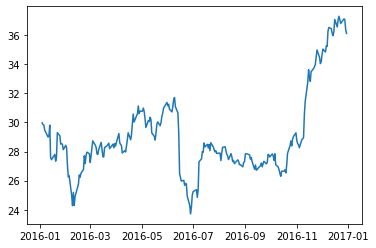

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

path1 = r'./prices.csv'
df =pd.read_csv(path1,parse_dates=[0])

df = df[df['symbol']== 'SYF']
df = df[df['date']> '2016-01-01']
df = df.sort_values(by='date')

print(df.head())



plt.plot(df['date'],df['open'])
plt.show()



In [ ]:
#获取code名字
